# View NSGA3 Results
This notebook allows you to load and visualize the data stored in the pickle files generated by `test_nsga3.py`.

All Generations Data:
{'Generation': 1, 'Design Variables': array([37.00965371, 32.8530159 ,  0.5103909 ,  0.41613491, 36.23865357,
       27.95715301,  0.8528398 ,  0.82853459]), 'TAC (Objective 1)': 0.8046626818939296, 'CO2 Emissions (Objective 2)': 7.3213807545144896}
{'Generation': 1, 'Design Variables': array([31.89638508,  9.78127797,  0.31316792,  0.46100958, 37.01950888,
        3.26069759,  1.36122212,  0.72799658]), 'TAC (Objective 1)': 0.8069624007380409, 'CO2 Emissions (Objective 2)': 7.238549042863429}
{'Generation': 1, 'Design Variables': array([40.51097924, 26.36649897,  1.0035923 ,  0.42391112, 41.26039763,
       35.59329343,  0.23059793,  0.84387466]), 'TAC (Objective 1)': 0.8946162971680605, 'CO2 Emissions (Objective 2)': 7.4138968547404085}
{'Generation': 1, 'Design Variables': array([36.64876167, 15.29343754,  0.34041493,  0.44921892, 43.04829318,
       20.30241582,  1.37460186,  0.75854623]), 'TAC (Objective 1)': 0.8177718772430578, 'CO2 Emissions (Objective 2)':

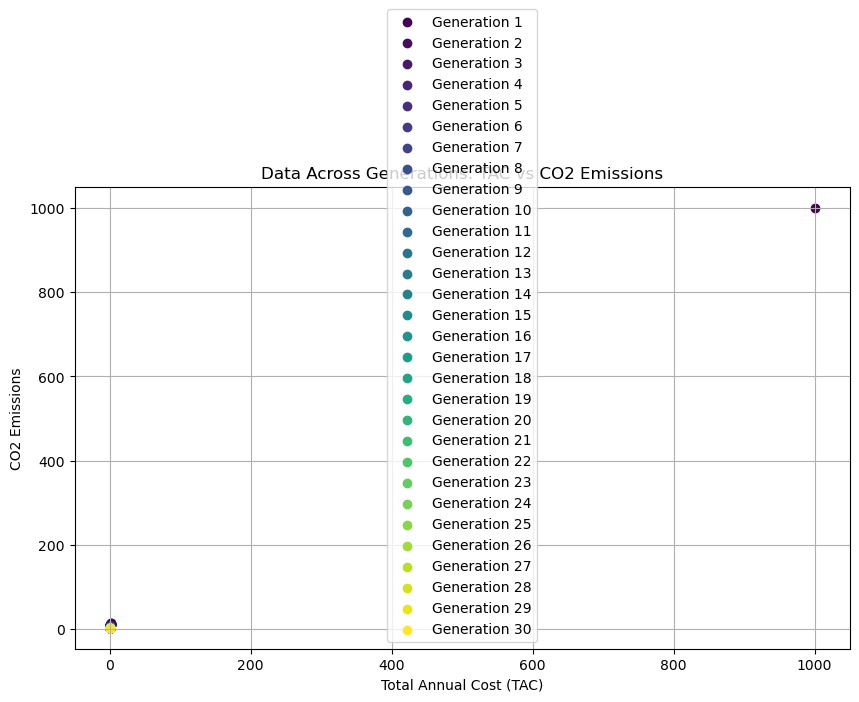

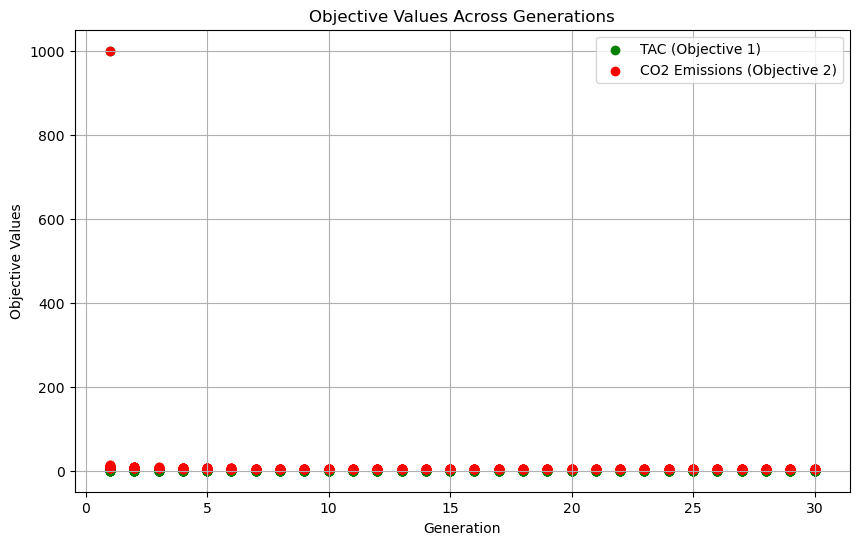

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Define file paths for the pickle files
all_generations_pickle_file = "21pop_30gen.pkl"

# Load all generations data
with open(all_generations_pickle_file, "rb") as f:
    all_generations_data = pickle.load(f)
    print("All Generations Data:")
    for entry in all_generations_data[:5]:  # Display the first 5 entries as a preview
        print(entry)

# Extract data for plotting
generations = [entry['Generation'] for entry in all_generations_data]
tac_values = [entry['TAC (Objective 1)'] for entry in all_generations_data]
co2_values = [entry['CO2 Emissions (Objective 2)'] for entry in all_generations_data]

# Get unique generations and assign colors
unique_generations = sorted(set(generations))
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_generations)))
generation_color_map = {gen: colors[i] for i, gen in enumerate(unique_generations)}

# Plot TAC vs CO2 Emissions (Pareto Front) with different colors for each generation
plt.figure(figsize=(10, 6))
for gen in unique_generations:
    gen_indices = [i for i, g in enumerate(generations) if g == gen]
    gen_tac = [tac_values[i] for i in gen_indices]
    gen_co2 = [co2_values[i] for i in gen_indices]
    plt.scatter(gen_tac, gen_co2, color=generation_color_map[gen], label=f'Generation {gen}')

plt.xlabel('Total Annual Cost (TAC)')
plt.ylabel('CO2 Emissions')
plt.title('Data Across Generations: TAC vs CO2 Emissions')
plt.legend()
plt.grid(True)
plt.show()

# Plot TAC and CO2 Emissions across generations
plt.figure(figsize=(10, 6))
plt.scatter(generations, tac_values, color='green', label='TAC (Objective 1)')
plt.scatter(generations, co2_values, color='red', label='CO2 Emissions (Objective 2)')
plt.xlabel('Generation')
plt.ylabel('Objective Values')
plt.title('Objective Values Across Generations')
plt.legend()
plt.grid(True)
plt.show()

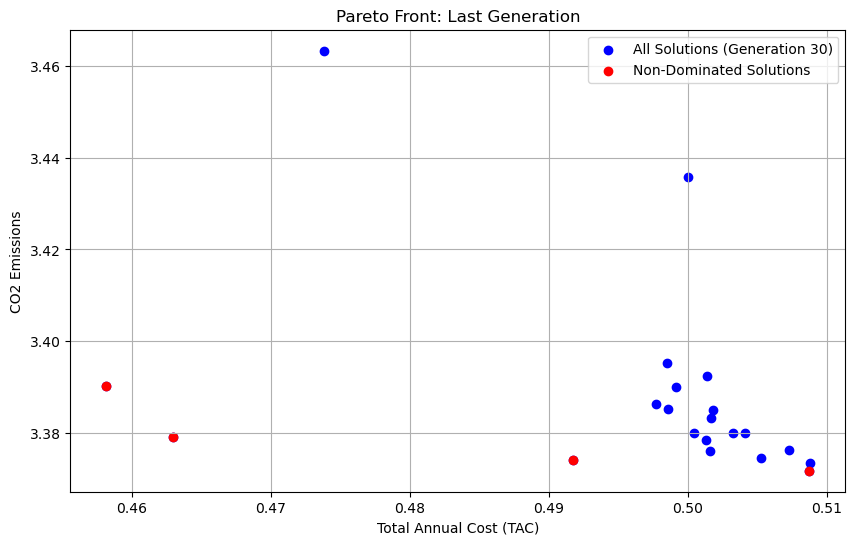

In [7]:
# Import the NonDominatedSorting class
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting

# Extract data for the last generation
last_generation = 30  # Find the last generation
last_gen_indices = [i for i, g in enumerate(generations) if g == last_generation]  # Indices of the last generation
last_gen_tac = [tac_values[i] for i in last_gen_indices]  # TAC values for the last generation
last_gen_co2 = [co2_values[i] for i in last_gen_indices]  # CO2 values for the last generation

# Combine TAC and CO2 values into a single array for non-dominated sorting
last_gen_F = np.array(list(zip(last_gen_tac, last_gen_co2)))

# Identify non-dominated solutions
non_dominated_sorting = NonDominatedSorting()
non_dominated = non_dominated_sorting.do(last_gen_F, only_non_dominated_front=True)

# Plot the Pareto front (last generation)
plt.figure(figsize=(10, 6))
plt.scatter(last_gen_tac, last_gen_co2, color='blue', label=f'All Solutions (Generation {last_generation})')  # All solutions
plt.scatter(last_gen_F[non_dominated, 0], last_gen_F[non_dominated, 1], color='red', label='Non-Dominated Solutions')  # Non-dominated solutions
plt.xlabel('Total Annual Cost (TAC)')
plt.ylabel('CO2 Emissions')
plt.title('Pareto Front: Last Generation')
plt.legend()
plt.grid(True)
plt.show()

# View Results from VCDistillationToy

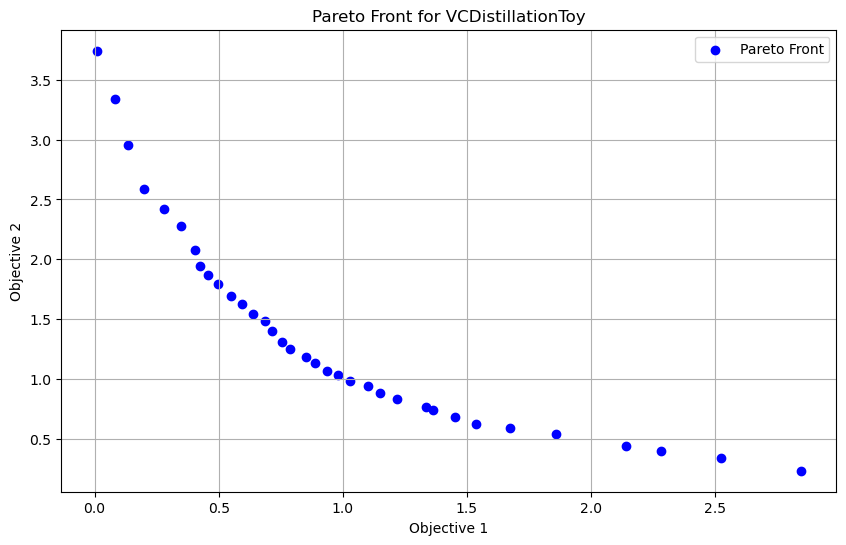

In [16]:
from test_VCtoy import VCDistillationToyProblem
# Load results from VCDistillationToy
toy_results_file = "vcdistillation_toy_results.pkl"

with open(toy_results_file, "rb") as f:
    toy_results = pickle.load(f)

# Extract Pareto front data
F = toy_results.F  # Objective values

# Plot the Pareto front
plt.figure(figsize=(10, 6))
plt.scatter(F[:, 0], F[:, 1], c="blue", label="Pareto Front")
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.title("Pareto Front for VCDistillationToy")
plt.legend()
plt.grid(True)
plt.show()